<a href="https://colab.research.google.com/github/NickolasCrema/pyspark_curso/blob/main/pyspark_sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso pyspark "Sistema de recomendacao"

Este projeto utiliza dados coletados da API do spotify, para a criacao de um modelo de recomendacao de playlists, com base em uma musica escolhida pelo usuario.


## Dados

1. Acousticness/Acústica: variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

2. Danceability/Dançabilidade: variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

3. Duration_ms: variável numérica; a duração da trilha em milissegundos.

4. Duration_min: variável numérica; a duração da faixa em minutos.

5. Energy/Energia: variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

6. Explicit/Explícito: variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

7. Id: o ID do Spotify para a faixa.

8. Instrumentalness/Instrumentalidade: variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

9. Key/Chave: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

10. Liveness/Ao vivo: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

11. Loudness/Volume em dB: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

12. Mode/Modo: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

13. Popularity/Popularidade: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

14. Speechiness/Fala: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

15. Tempo: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

16. Valence/Valência: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

17. Year/Ano: ano em que a música foi lançada.



## Preparando ambiente

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e623c221978ac9968656f3405243def92c04d15de3aecd460d3425b5ba470578
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

In [ ]:
spark = SparkSession.builder\
    .master('local[*]')\
    .appName('Sistema de recomendacao')\
    .getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Explorando os dados

In [ ]:
dados = spark.read.csv('/content/drive/MyDrive/data_spark_sistema_de_recomendacao/dados_musicas.csv', sep=';', header=True, inferSchema=True)

In [ ]:
dados.limit(5).toPandas()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [ ]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [ ]:
dados.count()

20311

In [ ]:
len(dados.columns)

19

In [ ]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).toPandas()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## Estudando os dados de musicas por ano

In [ ]:
dados_ano = spark.read.csv('/content/drive/MyDrive/data_spark_sistema_de_recomendacao/dados_musicas_ano.csv', header=True, inferSchema=True)

In [ ]:
dados_ano.limit(5).toPandas()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
dados_ano = dados_ano.filter("year >= 2000")

In [ ]:
dados_ano.limit(5).toPandas()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
1,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7
2,1,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500,7
3,1,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407,7
4,1,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143,7


In [ ]:
dados_ano.count()

21

In [ ]:
len(dados_ano.columns)

14

### Analise do impacto do tempo nas musicas

In [ ]:
import plotly.express as px

In [ ]:
pd_df = dados_ano.toPandas()

In [ ]:
fig = px.line(pd_df, x='year', y='loudness', markers=True, title='Variacao do loudness conforme os anos')


In [ ]:
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['valence'], name='Valence'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['danceability'], name='Danceability'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['energy'], name='Energy'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['liveness'], name='Liveness'))
fig.add_trace(go.Scatter(x=pd_df['year'], y=pd_df['speechiness'], name='Speechiness'))
fig.show()

### Analise de correlacao

In [ ]:
fig = px.imshow(pd_df.drop('mode', axis=1).corr(), text_auto=True)
fig.show()

## Estudando os dados das musicas por genero




### Clusterizacao por genero


In [ ]:
dados_genero = spark.read.csv('/content/drive/MyDrive/data_spark_sistema_de_recomendacao/dados_musicas_genero.csv', header=True, inferSchema=True)

In [ ]:
dados_genero.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [ ]:
dados_genero.printSchema()

root
 |-- mode: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- popularity: double (nullable = true)
 |-- key: integer (nullable = true)



In [ ]:
dados_genero.count()

2973

In [ ]:
dados_genero.select('genres').distinct().count()

2973

In [ ]:
len(dados_genero.columns)

14

### PCA e StandardScaler

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import PCA

In [ ]:
X = dados_genero.columns

In [ ]:
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
dados_genero_vector = VectorAssembler(inputCols = X, outputCol = 'features').transform(dados_genero).select('features', 'genres')

In [ ]:
dados_genero_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [ ]:
scaler = StandardScaler(inputCol = 'features', outputCol = 'scaled_features')

In [ ]:
scaler_model = scaler.fit(dados_genero_vector)

In [ ]:
dados_genero_scaled = scaler_model.transform(dados_genero_vector)

In [ ]:
dados_genero_scaled.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                   |genres                |scaled_features                                                                                                                                                                                                                                       |
+---------------

In [ ]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')

In [ ]:
model_pca = pca.fit(dados_genero_scaled)

In [ ]:
dados_genero_pca = model_pca.transform(dados_genero_scaled)

In [ ]:
dados_genero_pca.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.43816913737697955]  |
|[-0.5969679056633486,4.981612052751347]  |
|[-4.158460276223561,-0.8366525081079937] |
|[-2.387344878512217,-0.4877989015663406] |
|[-2.6501218371679083,-0.5756819768820469]|
+-----------------------------------------+
only showing top 5 rows



### Pipeline

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pca_pipeline = Pipeline(stages=[
     VectorAssembler(inputCols = X, outputCol = 'features'),
     StandardScaler(inputCol = 'features', outputCol = 'scaled_features'),
     PCA(k=2, inputCol='scaled_features', outputCol='pca_features'),
])

In [ ]:
pca_pipeline_model = pca_pipeline.fit(dados_genero)

In [ ]:
dados_genero_pca = pca_pipeline_model.transform(dados_genero)

In [ ]:
dados_genero_pca.show(5)

+----+--------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|      acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...|0.9793333333333332|0.1628833333333333

In [ ]:
dados_genero_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.507095366888567,0.43816913737697955]   |
|[-0.5969679056633486,4.981612052751347]   |
|[-4.158460276223561,-0.8366525081079937]  |
|[-2.387344878512217,-0.4877989015663406]  |
|[-2.6501218371679083,-0.5756819768820469] |
|[-1.4965091203367624,1.8644183183717793]  |
|[-3.9235207721573238,0.2851835002352834]  |
|[-4.611011109831115,-0.6783790472312372]  |
|[-2.8376900630842297,-0.5712993716580518] |
|[-2.706690139892783,-1.2593788079708297]  |
|[-4.698331383924287,1.276556968061945]    |
|[-3.3759874966798677,0.756074106430747]   |
|[-5.608998877066021,1.0427311644393216]   |
|[0.29549463521176883,-0.27638645862363015]|
|[-2.5725591062870423,-1.3169815431109795] |
|[-3.400822802049345,0.5073029625781902]   |
|[-4.366720316263418,-0.33648270597710866] |
|[-2.7254698167724003,0.5058604987046368]  |
|[-4.958112358381606,1.2627579957290729]   |
|[-3.69349

### K-Means

In [ ]:
from pyspark.ml.clustering import KMeans

In [ ]:
SEED = 1224

In [ ]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [ ]:
model_kmeans = kmeans.fit(dados_genero_pca)

In [ ]:
predictions_kmeans = model_kmeans.transform(dados_genero_pca)

In [ ]:
predictions_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[2.507095366888567,0.43816913737697955]   |2          |
|[-0.5969679056633486,4.981612052751347]   |2          |
|[-4.158460276223561,-0.8366525081079937]  |4          |
|[-2.387344878512217,-0.4877989015663406]  |0          |
|[-2.6501218371679083,-0.5756819768820469] |0          |
|[-1.4965091203367624,1.8644183183717793]  |2          |
|[-3.9235207721573238,0.2851835002352834]  |4          |
|[-4.611011109831115,-0.6783790472312372]  |1          |
|[-2.8376900630842297,-0.5712993716580518] |4          |
|[-2.706690139892783,-1.2593788079708297]  |0          |
|[-4.698331383924287,1.276556968061945]    |3          |
|[-3.3759874966798677,0.756074106430747]   |4          |
|[-5.608998877066021,1.0427311644393216]   |1          |
|[0.29549463521176883,-0.27638645862363015]|2          |
|[-2.5725591062870423,-1.316981

### Plotando a clustering

In [ ]:
from pyspark.ml.functions import vector_to_array

In [ ]:
pca_features_xy = predictions_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
    .withColumn('y', vector_to_array('pca_features')[1])\
    .select('x', 'y', 'cluster_pca', 'genres')

In [ ]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|  2.507095366888567| 0.43816913737697955|          2|21st century clas...|
|-0.5969679056633486|   4.981612052751347|          2|               432hz|
| -4.158460276223561| -0.8366525081079937|          4|               8-bit|
| -2.387344878512217| -0.4877989015663406|          0|                  []|
|-2.6501218371679083| -0.5756819768820469|          0|          a cappella|
|-1.4965091203367624|  1.8644183183717793|          2|            abstract|
|-3.9235207721573238|  0.2851835002352834|          4|      abstract beats|
| -4.611011109831115| -0.6783790472312372|          1|    abstract hip hop|
|-2.8376900630842297| -0.5712993716580518|          4|           accordeon|
| -2.706690139892783| -1.2593788079708297|          0|           accordion|
| -4.6983313

In [ ]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])

In [ ]:
fig.show()

In [ ]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

Resultado pouco explicativo

## Reducao da dimensionalidade com PCA nos dados originais

In [ ]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [ ]:
X = dados.columns
X

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'speechiness',
 'tempo',
 'artists_song']

In [ ]:
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')

In [ ]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [ ]:
dados_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [ ]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')

In [ ]:
model_scaler = scaler.fit(dados_encoded_vector)

In [ ]:
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [ ]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [ ]:
k = len(X)
k

15

In [ ]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')

In [ ]:
model_pca = pca.fit(dados_musicas_scaler)

In [ ]:
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [ ]:
sum(model_pca.explainedVariance)

0.9999999999999999

### Reduzindo numero de componentes

In [ ]:
lista = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [ ]:
import numpy as np

In [ ]:
k = sum(np.array(lista) <= 0.7)
k

6

In [ ]:
pca = PCA(k=6, inputCol='features_scaled', outputCol='pca_features')

In [ ]:
model_pca = pca.fit(dados_musicas_scaler)

In [ ]:
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [ ]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [ ]:
sum(model_pca.explainedVariance)

0.6665719513652388

## Aplicacao do cluster com K-Means nos dados originais

### Pipeline

In [ ]:
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='features_scaled'),
    PCA(k=6, inputCol='features_scaled', outputCol='pca_features'),
])

In [ ]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [ ]:
projection = model_pca_pipeline.transform(dados)

In [ ]:
projection.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

### K-Means

In [ ]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [ ]:
model_kmeans = kmeans.fit(projection)

In [ ]:
projection_kmeans = model_kmeans.transform(projection)

In [ ]:
projection_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+-----------+
|pca_features                                                                                                           |cluster_pca|
+-----------------------------------------------------------------------------------------------------------------------+-----------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |8          |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|4          |
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |35         |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |16         |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-

In [ ]:
projection_kmeans = projection_kmeans\
    .withColumn('x', vector_to_array('pca_features')[0])\
    .withColumn('y', vector_to_array('pca_features')[1])

In [ ]:
projection_kmeans.select('x', 'y', 'cluster_pca', 'artists_song').show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775704|-165.36848784906184|          8|   Coldplay - Yellow|
|-36.498857627749054|-167.85185045616558|          4|OutKast - Ms. Jac...|
|-35.460300916940554|-165.99633344577887|         35|Linkin Park - In ...|
| -35.56301325520583|-165.59515096480607|         16|3 Doors Down - Kr...|
| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
| -36.71322229026232|-166.48208483099708|         34|Disturbed - Down ...|
|-36.013246178822214|-166.63514920955345|         34| Nelly - Ride Wit Me|
|  -36.5426877121049|-166.97928234833242|         23|       Eminem - Stan|
| -36.42524900978431|-165.10535006330758|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577073|-166.03098838247917|         34|Britney Spears - ...|
|-31.639065936568755|  -1

In [ ]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

### Calculando Distancia euclidiana

In [ ]:
dados.select('name').filter("artists LIKE 'Green Day'").show()

+--------------------+
|                name|
+--------------------+
|      American Idiot|
|Wake Me up When S...|
|Holiday / Bouleva...|
|   Jesus of Suburbia|
|             21 Guns|
|Boulevard of Brok...|
|            Minority|
|             Warning|
|             Waiting|
|     Know Your Enemy|
|   Macy's Day Parade|
|Give Me Novacaine...|
|         Whatsername|
|Are We the Waitin...|
|             Holiday|
|          Homecoming|
|Extraordinary Gir...|
|21st Century Brea...|
|Boulevard of Brok...|
|¿Viva La Gloria? ...|
+--------------------+
only showing top 20 rows



In [ ]:
nome_musica = 'Green Day - American Idiot'

In [ ]:
cluster = projection_kmeans\
    .filter(projection_kmeans.artists_song == nome_musica)\
    .select('cluster_pca')\
    .collect()[0][0]
cluster

13

In [ ]:
musicas_recomendadas = projection_kmeans\
    .filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')

musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Nelly - Country G...|3wMUvT6eIw2L5cZFG...|[-36.022399748656...|
|Limp Bizkit - My Way|2gSVKxPDww9Eep5rd...|[-36.284940371311...|
|Mindless Self Ind...|09RhTAi0nuzCs5KS2...|[-35.424379767712...|
|Puddle Of Mudd - ...|16DhvbuyvJob4Q9GH...|[-35.986699454172...|
|South Park Mexica...|1Yc1mFmJrICDHQNze...|[-35.722999789313...|
|Slipknot - The He...|3OYZWMm5m2DEwq2Tc...|[-35.628245215775...|
|Eminem - 'Till I ...|4xkOaSrkexMciUUog...|[-35.909229848266...|
|     Nelly - Dilemma|0ARK753YaiJbpLUk7...|[-35.545073630458...|
|Christina Aguiler...|59ZTxQo8rBycIXPLU...|[-36.033718932859...|
|System Of A Down ...|3RgDvs9Jpvn3kUuaT...|[-36.171794468438...|
|Marilyn Manson - ...|3C84jaEdYxiq8LC4j...|[-36.091102720332...|
|Green Day - Ameri...|6nTiIhLmQ3FWhvrGa...|[-37.001923264839...|
|JAY-Z - Numb / En...|5sN

In [ ]:
componentes_musica = musicas_recomendadas\
    .filter(musicas_recomendadas.artists_song == nome_musica)\
    .select('pca_features')\
    .collect()[0][0]

componentes_musica

DenseVector([-37.0019, -165.7173, -11.2528, -138.806, -11.5316, 7.0078])

In [ ]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

def calcula_distancia_euclidiana(value):
  return euclidean(componentes_musica, value)

udf_calcula_distancia_euclidiana = f.udf(calcula_distancia_euclidiana, FloatType())

In [ ]:
musicas_recomendadas_dist = musicas_recomendadas\
    .withColumn('Dist', udf_calcula_distancia_euclidiana('pca_features'))

recomendadas = spark\
      .createDataFrame(
          musicas_recomendadas_dist\
          .filter(musicas_recomendadas_dist.artists_song != nome_musica)\
          .sort('Dist')\
          .take(10)
      )\
      .select('artists_song', 'id', 'Dist')
recomendadas.show(truncate=False)

+--------------------------------------------+----------------------+------------------+
|artists_song                                |id                    |Dist              |
+--------------------------------------------+----------------------+------------------+
|BTS - Boy in Luv                            |0i0hqOQdyFFd4cR5s32w8x|1.1283761262893677|
|Avril Lavigne - Here's to Never Growing Up  |0qwcGscxUHGZTgq0zcaqk1|1.1985557079315186|
|Avenged Sevenfold - Doing Time              |4OyfdJiHM6sbfkFmRLrygg|1.4055945873260498|
|Marshmello - Spotlight                      |6VrCmhRBFnuGKmtNfk4jDs|1.4633023738861084|
|Nickelback - Edge Of A Revolution           |5JjHr4GeuAERaa1qgsbv6A|1.4924354553222656|
|Halestorm - Here's to Us                    |0a5UnIvDUBzqwUduJsouRy|1.4929388761520386|
|Don Omar - Hooka                            |0BenZn1xELuxhb7Pjwyjxv|1.528043508529663 |
|Eminem - Won't Back Down                    |7kNlRLC9PEH8nXMVawssMx|1.529543399810791 |
|Louis The Child - Th

In [ ]:
def recomendador(nome_musica):
  cluster = projection_kmeans\
    .filter(projection_kmeans.artists_song == nome_musica)\
    .select('cluster_pca')\
    .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
    .filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')

  musicas_recomendadas_dist = musicas_recomendadas\
    .withColumn('Dist', udf_calcula_distancia_euclidiana('pca_features'))

  recomendadas = spark\
      .createDataFrame(
          musicas_recomendadas_dist\
          .filter(musicas_recomendadas_dist.artists_song != nome_musica)\
          .sort('Dist')\
          .take(10)
      )\
      .select('artists_song', 'id', 'Dist')
  recomendadas.select('artists_song').show(truncate=False)

In [ ]:
recomendador("Green Day - American Idiot")

+--------------------------------------------+
|artists_song                                |
+--------------------------------------------+
|BTS - Boy in Luv                            |
|Avril Lavigne - Here's to Never Growing Up  |
|Avenged Sevenfold - Doing Time              |
|Marshmello - Spotlight                      |
|Nickelback - Edge Of A Revolution           |
|Halestorm - Here's to Us                    |
|Don Omar - Hooka                            |
|Eminem - Won't Back Down                    |
|Louis The Child - The City (with Quinn XCII)|
|TWICE - Signal                              |
+--------------------------------------------+



## Utilizando API do Spotify para customizar o resultado

### Preparando ambiente

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [ ]:
id_token = ''
secret_token = ''

with open('/content/drive/MyDrive/data_spark_sistema_de_recomendacao/tokens.txt', 'r') as read_file:
  full_text = read_file.read()
  id_token = full_text.split('\n')[0]
  secret_token = full_text.split('\n')[1]

scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri = 'localhost:5000/callback',
    client_id = id_token,
    client_secret = secret_token,
)

In [ ]:
client_credentials_manager = SpotifyClientCredentials(
    client_id = id_token,
    client_secret = secret_token
)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Testando output

In [ ]:
def recomendador(nome_musica):
  #Calcula musicas recomendadas
  cluster = projection_kmeans\
    .filter(projection_kmeans.artists_song == nome_musica)\
    .select('cluster_pca')\
    .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
    .filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')

  musicas_recomendadas_dist = musicas_recomendadas\
    .withColumn('Dist', udf_calcula_distancia_euclidiana('pca_features'))

  recomendadas = spark\
      .createDataFrame(
          musicas_recomendadas_dist\
          .filter(musicas_recomendadas_dist.artists_song != nome_musica)\
          .sort('Dist')\
          .take(10)
      )\
      .select('artists_song', 'id', 'Dist')

  #Pega informacoes da API
  playlist_id = recomendadas.select('id').collect()

  playlist_track = [sp.track(id[0]) for id in playlist_id]

  return len(playlist_track)

In [ ]:
recomendador("Green Day - American Idiot")

10

### Coletando imagem do album

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
nome_musica = 'Green Day - American Idiot'

In [ ]:
id = projection_kmeans\
    .filter(projection_kmeans.artists_song == nome_musica)\
    .select('id').collect()[0][0]

In [ ]:
track = sp.track(id)

In [ ]:
url = track['album']['images'][1]['url']
name = track['name']

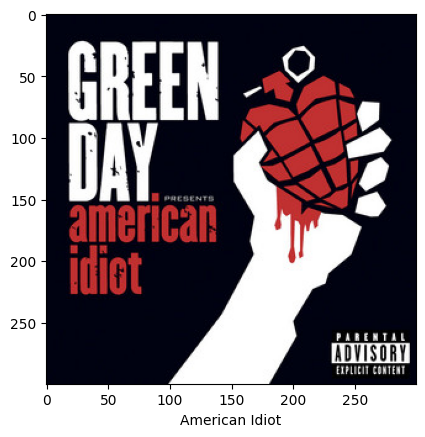

In [ ]:
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

In [ ]:
def visualize_songs(name,url):

    plt.figure(figsize=(12,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

In [ ]:
cluster = projection_kmeans\
  .filter(projection_kmeans.artists_song == nome_musica)\
  .select('cluster_pca')\
  .collect()[0][0]

musicas_recomendadas = projection_kmeans\
    .filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')

musicas_recomendadas_dist = musicas_recomendadas\
  .withColumn('Dist', udf_calcula_distancia_euclidiana('pca_features'))

recomendadas = spark\
      .createDataFrame(
          musicas_recomendadas_dist\
          .filter(musicas_recomendadas_dist.artists_song != nome_musica)\
          .sort('Dist')\
          .take(10)
      )\
      .select('artists_song', 'id', 'Dist')

playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
  track = sp.track(i[0])
  url.append(track['album']['images'][1]['url'])
  name.append(track['name'])

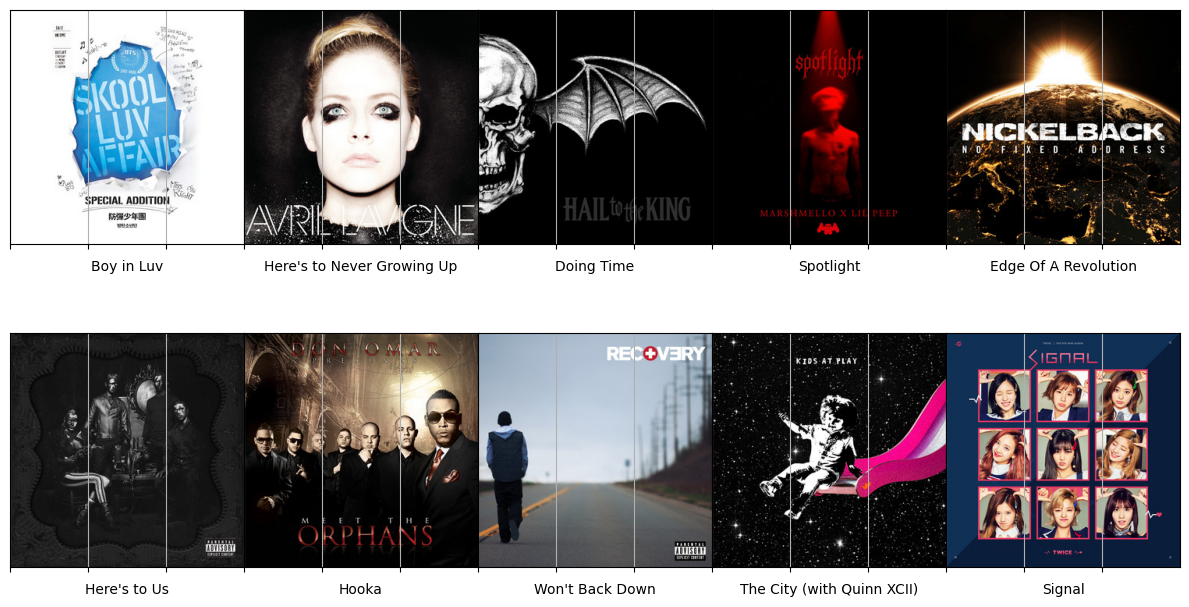

In [ ]:
visualize_songs(name, url)

### Aplicando aos dados

In [ ]:
def recomendador(nome_musica):
  #Calcula musicas recomendadas
  cluster = projection_kmeans\
    .filter(projection_kmeans.artists_song == nome_musica)\
    .select('cluster_pca')\
    .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
    .filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')

  musicas_recomendadas_dist = musicas_recomendadas\
    .withColumn('Dist', udf_calcula_distancia_euclidiana('pca_features'))

  recomendadas = spark\
      .createDataFrame(
          musicas_recomendadas_dist\
          .filter(musicas_recomendadas_dist.artists_song != nome_musica)\
          .sort('Dist')\
          .take(10)
      )\
      .select('artists_song', 'id', 'Dist')

  #Pega informacoes da API
  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
    track = sp.track(i[0])
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])

  #Plotando capas
  plt.figure(figsize=(12,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
  plt.show()

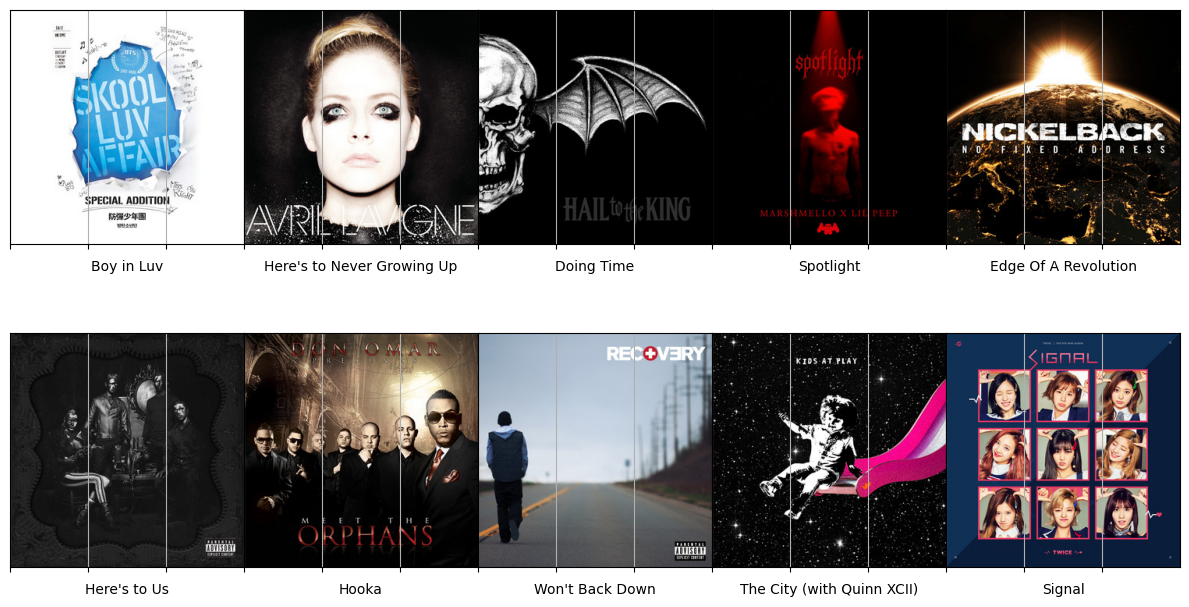

In [ ]:
recomendador('Green Day - American Idiot')